In [2]:
#Ejemplo regresion lineal

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

In [3]:
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

datos = pd.DataFrame({"equipos":equipos, "bateos":bateos, "runs":runs})
datos.head(5)

,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787
3,Kansas,5672,730
4,St.,5532,762


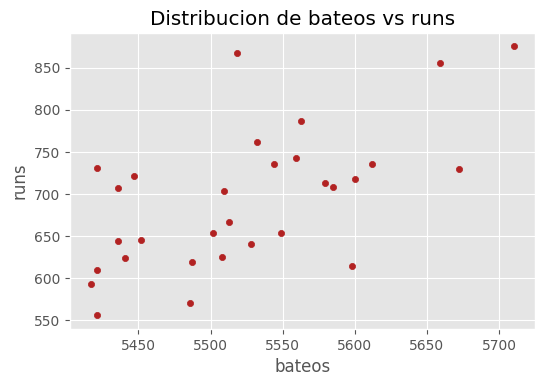

In [4]:
fig, ax = plt.subplots(figsize=(6,3.84))

datos.plot(
    x    = 'bateos',
    y    = 'runs',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)

ax.set_title('Distribucion de bateos vs runs')
ax.set_xlabel('bateos')
ax.set_ylabel('runs')
plt.show()

In [9]:
#Correlacion

corr_test = pearsonr(datos['bateos'], datos['runs'])
print("Coeficiente de correlacion de Person: ", corr_test[0])

print("P-value: ", corr_test[1])

Coeficiente de correlacion de Person:  0.6106270467206688
P-value:  0.0003388351359791978


In [10]:
X = datos[['bateos']]
y = datos['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

Modelo = LinearRegression()
Modelo.fit(X = X_train.reshape(-1,1), y = y_train)


LinearRegression()

In [13]:
print("Intercept: ", Modelo.intercept_)
print("Coeficientes: ", list(zip(X.columns, Modelo.coef_.flatten())))

print("Coeficiente de determinacion R^2: ", Modelo.score(X, y))

Intercept:  [-2367.7028413]
Coeficientes:  [('bateos', 0.5528713534479736)]
Coeficiente de determinacion R^2:  0.3586119899498744


In [14]:
predicciones = Modelo.predict(X_test)
print(predicciones[0:3,])

rmse = mean_squared_error(y_true = y_test,
                          y_pred = predicciones,
                          squared=False)

print("")
print("Error RMSE es: ", rmse)

[[643.78742093]
 [720.0836677 ]
 [690.78148597]]

Error RMSE es:  59.336716083360486


In [16]:
X = datos[['bateos']]
y = datos['runs']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [17]:
datos_train = pd.DataFrame(np.hstack((X_train, y_train)), columns = ['bateos', 'runs'])

modelo = smf.ols(formula = 'runs ~ bateos', data = datos_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   runs   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     8.191
Date:                Tue, 20 Aug 2024   Prob (F-statistic):            0.00906
Time:                        21:51:50   Log-Likelihood:                -134.71
No. Observations:                  24   AIC:                             273.4
Df Residuals:                      22   BIC:                             275.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2367.7028   1066.357     -2.220      0.0

In [18]:
X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(y_train, X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     8.191
Date:                Tue, 20 Aug 2024   Prob (F-statistic):            0.00906
Time:                        21:52:59   Log-Likelihood:                -134.71
No. Observations:                  24   AIC:                             273.4
Df Residuals:                      22   BIC:                             275.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2367.7028   1066.357     -2.220      0.0

In [20]:
modelo.conf_int(alpha = 0.05)

array([[-4.57919205e+03, -1.56213633e+02],
       [ 1.52244180e-01,  9.53498527e-01]])

In [31]:
#Me quede en la In 71
Predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha = 0.05)
Predicciones.head(5)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,768.183475,32.658268,700.454374,835.912577,609.456054,926.910897
1,646.551778,19.237651,606.655332,686.448224,497.558860,795.544695
2,680.276930,14.186441,650.856053,709.697807,533.741095,826.812765
3,735.011194,22.767596,687.794091,782.228298,583.893300,886.129088
4,629.412766,23.713237,580.234522,678.591009,477.670673,781.154858
